In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

conn = sqlite3.connect('../data/switrs.sqlite')
label_encoder = LabelEncoder()

#### This database has 4 tables

In [5]:
case_ids_df = pd.read_sql_query('SELECT * FROM case_ids LIMIT 5', conn)
case_ids_df.head()

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


Contains basic information about cases, including the year they occurred.

In [3]:
collisions_df = pd.read_sql_query('SELECT * FROM collisions LIMIT 5', conn)
collisions_df.head()

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,county_location,special_condition,beat_type,...,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,0081715,1941,11342,212,not chp,>250000,1941,los angeles,0,not chp,...,0,0,0,None,None,NaN,NaN,2020-03-14,07:45:00,2020-06-22
1,0726202,3600,8945,064,not chp,50000 to 100000,3612,san bernardino,0,not chp,...,0,0,0,None,None,NaN,NaN,2020-07-26,02:50:00,2020-09-30
2,3858022,1005,P379,2C,not chp,>250000,1005,fresno,0,not chp,...,0,0,0,None,None,NaN,NaN,2009-02-03,17:11:00,2009-04-27
3,3899441,9120,17248,None,2200 thru 0559,2500 to 10000,0801,del norte,0,chp state highway,...,0,0,0,None,None,NaN,NaN,2009-02-28,01:45:00,2009-11-02
4,3899442,9530,19005,None,0600 thru 1359,>250000,1942,los angeles,0,chp state highway,...,0,0,0,None,None,33.86465,-118.28533,2009-02-09,10:20:00,2010-01-14


Stores details about collisions, including jurisdiction, location, and other related data.

In [4]:
parties_df = pd.read_sql_query('SELECT * FROM parties LIMIT 5', conn)
parties_df.head()

,id,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,party_drug_physical,direction_of_travel,...,other_associate_factor_2,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,statewide_vehicle_type,chp_vehicle_type_towing,chp_vehicle_type_towed,party_race
0,1,0081715,1,driver,1,female,35.0,not applicable,not applicable,north,...,None,0,0,proceeding straight,2007,ford,None,None,None,other
1,2,0081715,2,driver,0,female,43.0,not applicable,not applicable,north,...,None,0,0,proceeding straight,2019,None,None,None,None,hispanic
2,3,0726202,1,driver,1,None,NaN,impairment unknown,G,north,...,None,0,0,proceeding straight,2005,None,passenger car,"passenger car, station",None,None
3,4,3858022,1,driver,1,male,47.0,impairment unknown,G,east,...,None,0,0,None,2007,dodge,emergency vehicle,police car,00,black
4,5,3858022,2,driver,0,male,58.0,had not been drinking,None,east,...,None,0,0,None,2006,nissan,None,None,00,hispanic


Provides information about individuals involved in accidents, such as drivers, pedestrians, and cyclists.

In [5]:
victims_df = pd.read_sql_query('SELECT * FROM victims LIMIT 5', conn)
victims_df.head()

,id,case_id,party_number,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equipment_1,victim_safety_equipment_2,victim_ejected
0,1,3858022,1,passenger,female,24,no injury,passenger seat 4,air bag not deployed,None,not ejected
1,2,3858022,1,passenger,male,31,no injury,passenger seat 6,air bag not deployed,None,not ejected
2,3,3899450,1,driver,female,72,complaint of pain,driver,air bag not deployed,lap/shoulder harness used,not ejected
3,4,3899453,2,driver,male,66,complaint of pain,driver,air bag deployed,lap/shoulder harness used,not ejected
4,5,3899453,3,passenger,male,65,no injury,passenger seat 3,air bag not deployed,lap/shoulder harness used,not ejected


Stores data about victims, including their role, gender, age, and other relevant details.

## My Theory
I believe young people are more dangerous on the road; they are responsible for more collisions and are more likely to cause injuries or fatalities. To test this theory, I plan to analyze cases where individuals were at fault for collisions. That is why I will only look and analyze cases of people that were at fault, because if the person is not guilty of the collision, then there is no correlation with his age/sex/race etc.

Lets analyze `parties` table.  
This table has a lot of numeric fields. The most essential fields are `vehicle_year`,`party_type`, `at_fault`, `party_sex`, `party_age`, `party_sobriety` (can be a numeric field), `party_number_killed` (injured), `party_race`.  
`vehicle_year` says what year the vehicle is.  
`party_age` says the age of a victim.  
`party_sex` and `party_race` says about the person in general.  

vehicle year

In [6]:
cars_df = pd.read_sql_query('SELECT case_id, vehicle_year FROM parties where at_fault == 1;', conn)

vehicle year

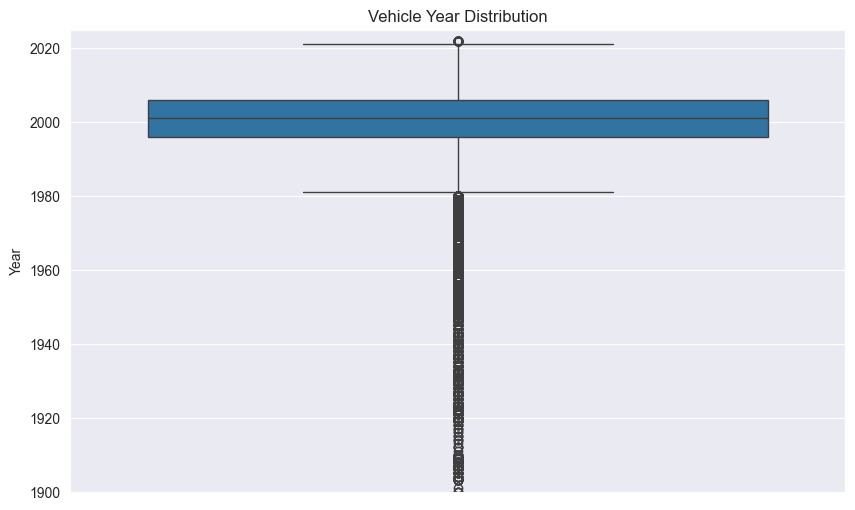

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cars_df['vehicle_year'])
plt.ylim(1900, 2025)
plt.title("Vehicle Year Distribution")
plt.ylabel("Year")
plt.show()

as we can see, there are a lot of outliers and most of them are below 1980 year. => we can take all vehicles from 1980 to 2022 (since database if from 2022)

In [8]:
cars_df = cars_df[
    (cars_df['vehicle_year'].notna()) &
    (cars_df['vehicle_year'] >= 1980) &
    (cars_df['vehicle_year'] <= 2022)
    ]
cars_df.head()

,case_id,vehicle_year
0,0081715,2007.0
1,0726202,2005.0
2,3858022,2007.0
3,3899441,1994.0
4,3899442,2001.0


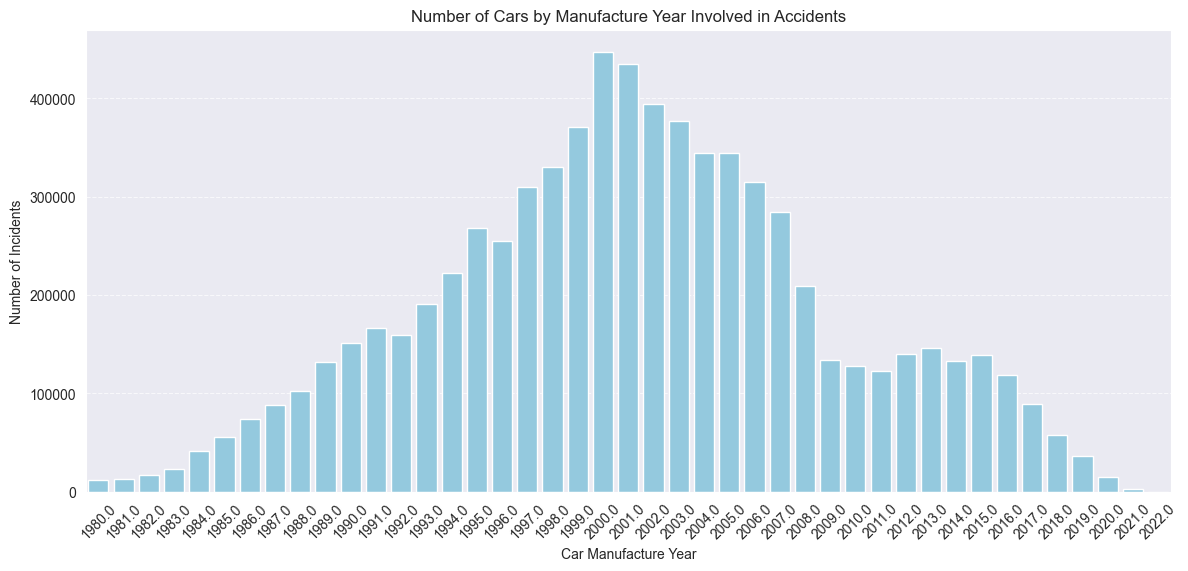

Median Year: 2001.0
Mean Year: 2001
Standard Deviation: 7.88


In [9]:
car_counts = cars_df['vehicle_year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.barplot(x=car_counts.index, y=car_counts.values, color='skyblue')
plt.title('Number of Cars by Manufacture Year Involved in Accidents')
plt.xlabel('Car Manufacture Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Median Year: {cars_df['vehicle_year'].median()}")
print(f"Mean Year: {int(cars_df['vehicle_year'].mean())}")
print(f"Standard Deviation: {cars_df['vehicle_year'].std():.2f}")

#### as we can see, vehicles made in 2000 collide the most
#### that's probably because there are more cars of that year, then any other

# person's age

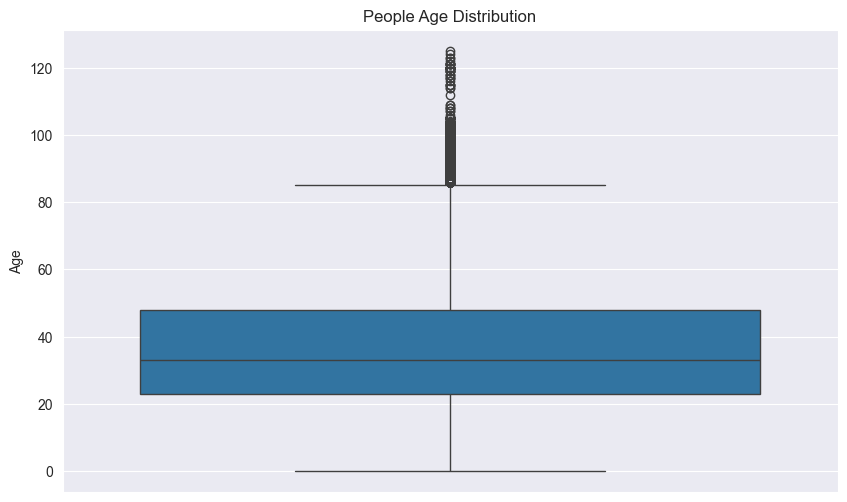

In [10]:
peoples_age_df = pd.read_sql_query('SELECT party_age FROM parties where at_fault == 1;', conn)
plt.figure(figsize=(10, 6))
sns.boxplot(data=peoples_age_df['party_age'])
plt.title("People Age Distribution")
plt.ylabel("Age")
plt.show()

obviously, we should not take into account people younger than 12 and older than 90, since they do not really drive.  
we can also see that in data there are a lot of outliers that we need to get rid of. 

In [11]:
peoples_age_df = peoples_age_df[
    (peoples_age_df['party_age'].notna()) &
    (peoples_age_df['party_age'] >= 12) &
    (peoples_age_df['party_age'] <= 90)
    ]

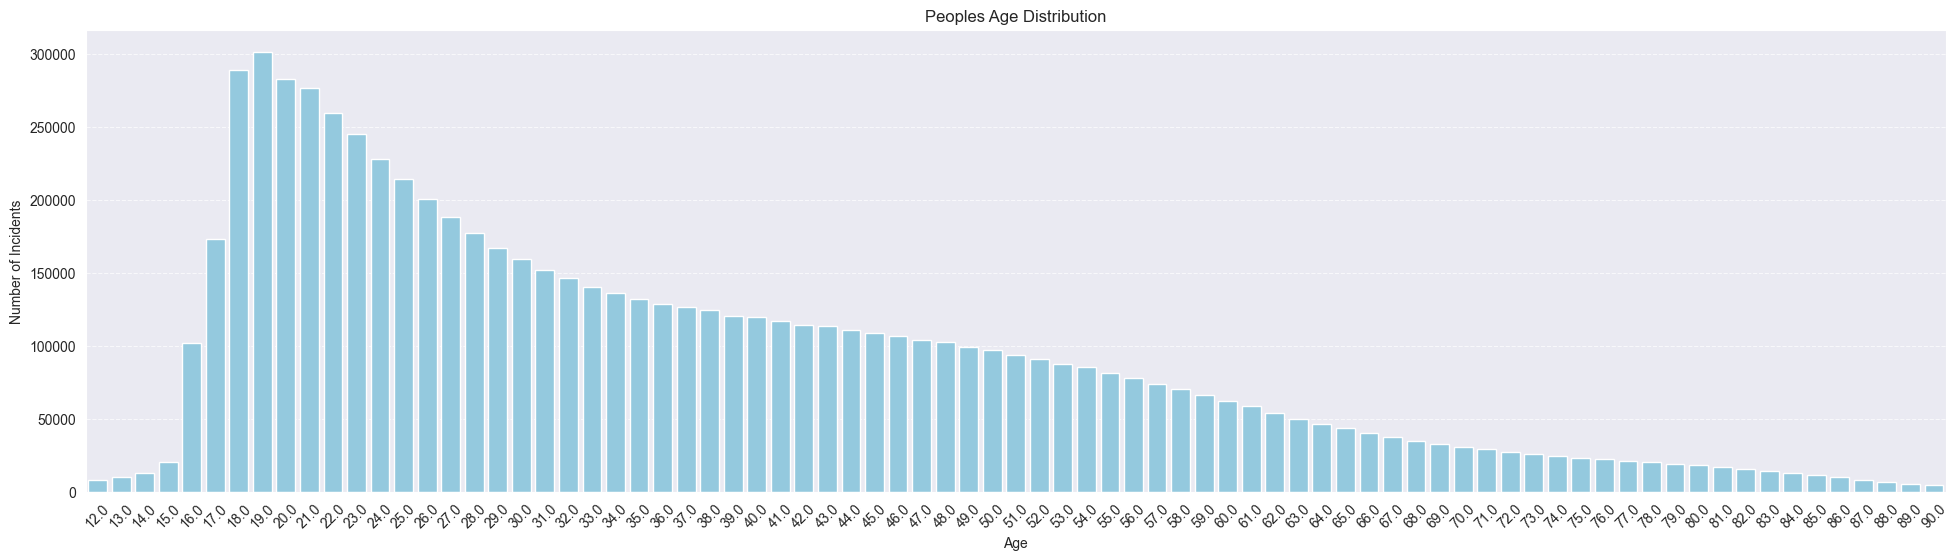

Median Year: 33.0
Mean Year: 36
Standard Deviation: 16.68


In [12]:
peoples_age_counts = peoples_age_df['party_age'].value_counts().sort_index()

plt.figure(figsize=(24, 6))
sns.barplot(x=peoples_age_counts.index, y=peoples_age_counts.values, color='skyblue')
plt.title('Peoples Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Median Year: {peoples_age_df['party_age'].median()}")
print(f"Mean Year: {int(peoples_age_df['party_age'].mean())}")
print(f"Standard Deviation: {peoples_age_df['party_age'].std():.2f}")

as we can see, the most dangerous drivers are young: 18 to 30 yo.  
as the person gets older, the less likely they are to get into accident.

# People's description

In [13]:
people_info_df = pd.read_sql_query(
    'SELECT party_sex, party_age, cellphone_in_use, party_race FROM parties where at_fault == 1',
    conn)
people_info_df.head()

,party_sex,party_age,cellphone_in_use,party_race
0,female,35.0,0.0,other
1,None,NaN,NaN,None
2,male,47.0,NaN,black
3,male,16.0,0.0,asian
4,male,40.0,0.0,hispanic


we can clearly see that there are NaNs in data that we need to get rid of

In [14]:
people_info_df = people_info_df[
    ((people_info_df['party_sex'] == 'female') | (people_info_df['party_sex'] == 'male')) &
    (people_info_df['party_age'].notna()) &
    (people_info_df['cellphone_in_use'].notna()) &
    (people_info_df['party_race'].notna())
    ]
people_info_df.head()

,party_sex,party_age,cellphone_in_use,party_race
0,female,35.0,0.0,other
3,male,16.0,0.0,asian
4,male,40.0,0.0,hispanic
5,male,24.0,0.0,hispanic
6,male,36.0,0.0,hispanic


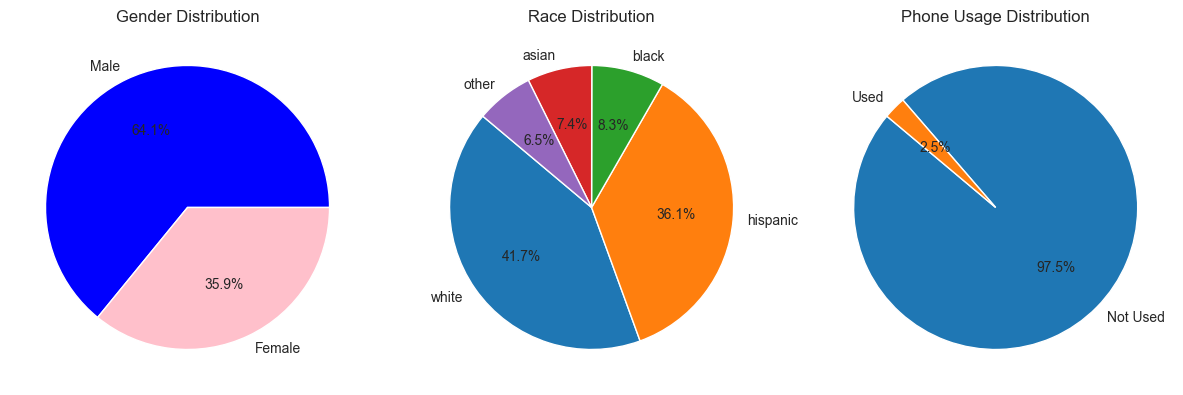

In [15]:
male_count = people_info_df[people_info_df['party_sex'] == 'male'].shape[0]
female_count = people_info_df[people_info_df['party_sex'] == 'female'].shape[0]

race_counts = people_info_df['party_race'].value_counts()
phone_usage = people_info_df['cellphone_in_use'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

axes[0].pie(
    [male_count, female_count],
    labels=['Male', 'Female'],
    autopct='%1.1f%%',
    colors=['blue', 'pink']
)
axes[0].set_title('Gender Distribution')

axes[1].pie(
    race_counts,
    labels=race_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
axes[1].set_title('Race Distribution')

axes[2].pie(
    phone_usage,
    labels=['Not Used', 'Used'],
    autopct='%1.1f%%',
    startangle=140
)
axes[2].set_title('Phone Usage Distribution')

plt.tight_layout()
plt.show()

1. men get into accidents twice as much are women.  
2. white and hispanic races are much more likely to get into accidents then asian and black.
3. only a small percent of people got into accidents because of their phone.

# now lets see whether young (18-30) people kill people more often then old (30+)

In [7]:
sql_request = '''
SELECT CASE
           WHEN party_age >= 18 AND party_age <= 30 THEN 'youngs'
           WHEN party_age > 30 THEN 'adults'
           ELSE 'unknown'
           END                   AS age_group,
       COUNT(*)                  AS total_people,
       SUM(party_number_killed)  AS total_killed,
       SUM(party_number_injured) AS total_injured
FROM parties
WHERE party_age >= 18 and at_fault == 1
GROUP BY age_group;
'''
traumas_df = pd.read_sql_query(sql_request, conn)
traumas_df.head()

,age_group,total_people,total_killed,total_injured
0,adults,3964365,30121,1117818
1,youngs,2987209,18865,926101


In [8]:
traumas_df['total_people'].iloc[0] / traumas_df['total_people'].iloc[1]

np.float64(1.3271133690344399)

In [9]:
traumas_df['fatality_prob'] = traumas_df['total_killed'] / traumas_df['total_people']
traumas_df['trauma_prob'] = traumas_df['total_injured'] / traumas_df['total_people']
traumas_df['fatality_prob'] = traumas_df['fatality_prob'].round(5)
traumas_df['trauma_prob'] = traumas_df['trauma_prob'].round(5)
traumas_df.head()

,age_group,total_people,total_killed,total_injured,fatality_prob,trauma_prob
0,adults,3964365,30121,1117818,0.00760,0.28197
1,youngs,2987209,18865,926101,0.00632,0.31002


/var/folders/5w/jv8qq0fn5b3dwhxy_06sbt7m0000gn/T/ipykernel_71839/393284227.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='age_group', y='total_killed', data=traumas_df, ax=axes[0], palette=['#66C2A5', '#FC8D62', '#8DA0CB'], hue='total_killed')


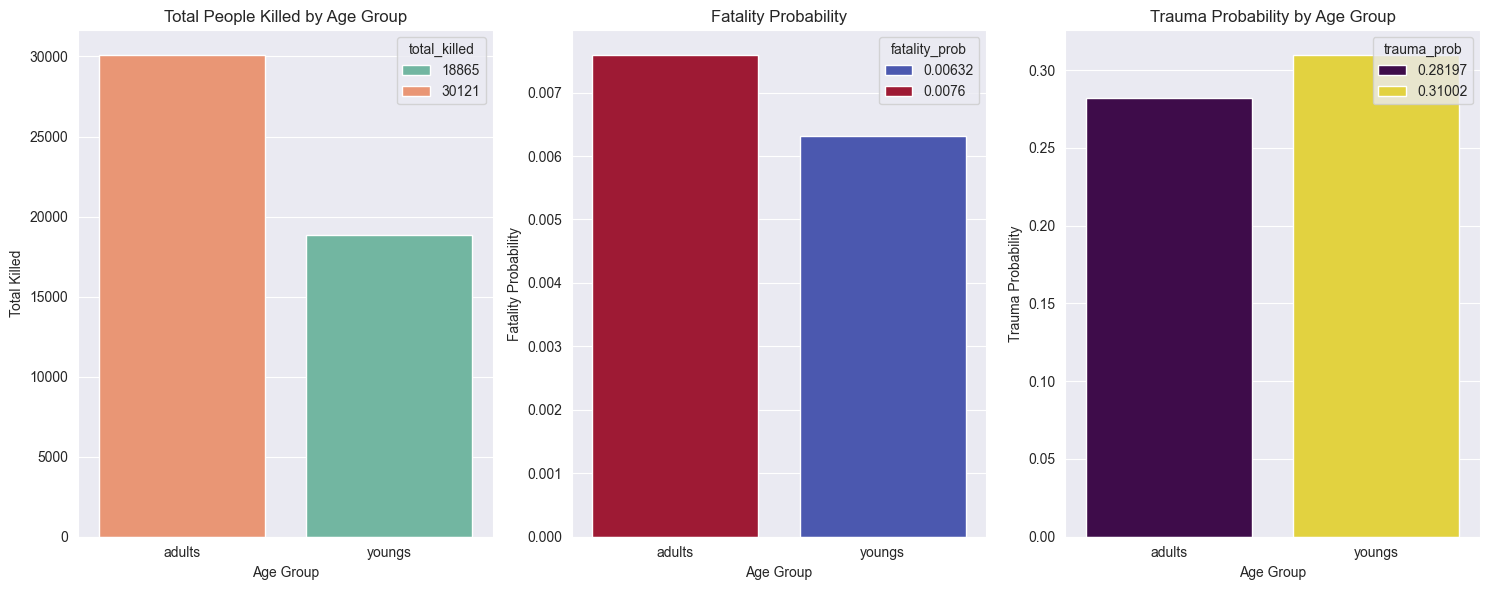

In [12]:
_, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.barplot(x='age_group', y='total_killed', data=traumas_df, ax=axes[0], palette=['#66C2A5', '#FC8D62', '#8DA0CB'], hue='total_killed')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Total Killed')
axes[0].set_title('Total People Killed by Age Group')

sns.barplot(x='age_group', y='fatality_prob', data=traumas_df, ax=axes[1], palette='coolwarm', hue='fatality_prob')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Fatality Probability')
axes[1].set_title('Fatality Probability')

sns.barplot(x='age_group', y='trauma_prob', data=traumas_df, ax=axes[2], palette='viridis', hue='trauma_prob')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Trauma Probability')
axes[2].set_title('Trauma Probability by Age Group')

plt.tight_layout()
plt.show()

as we can see, adults kill more people in general. that's simply because this group is the largest.  
however, adults are much more likely to unalive people.  
on the other hand, young drivers can injure people with slightly more chances.

## Theory Conclusion
- Young people cause more collisions.
- Young drivers are less likely to kill others.
- Young drivers more likely to injure others.
- The risk of collisions decreases with age.
- Young drivers are primarily a threat to property (cars), not health.

Therefore, the theory is only proven true partially.

In [6]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

data = pd.read_sql("SELECT party_age, party_sex, party_race, at_fault FROM parties;", conn)

data['party_age'] = data['party_age'].fillna(data['party_age'].mean())
data['party_sex'] = data['party_sex'].fillna(data['party_sex'].mode()[0])
data['party_race'] = data['party_race'].fillna(data['party_race'].mode()[0])

X = data[['party_age', 'party_sex', 'party_race']]
y = data['at_fault']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['party_age']),
        ('cat', OneHotEncoder(), ['party_sex', 'party_race'])
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(cv=5, verbose=0))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

joblib.dump(model, 'model.pkl')
print("Model saved to 'model.pkl'")

Training: 100%|███████████████████████████████████████████████████████| 1/1 [01:06<00:00, 66.68s/it]


Accuracy: 0.57
Model saved to 'model.pkl'
